In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the libraries**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import jaccard_score


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

**MLPClassifier for Multi-Class Classification**

**1.  Loading the data**

In [ ]:
position_visual_data = pd.read_csv("/content/Final_MultiModal_Data.csv")
position_visual_data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '505', '506', '507', '508', '509', '510', '511', 'Latitude',
       'Longitude', 'beam_index_1'],
      dtype='object', length=516)

**3.2 Data pre-processing**

In [ ]:
x = position_visual_data.drop(['beam_index_1'], axis=1)
y = position_visual_data['beam_index_1']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

In [ ]:
x

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,504,505,506,507,508,509,510,511,Latitude,Longitude
0,0,0.097568,0.185196,0.039685,0.021913,-0.075682,-0.031300,0.072241,0.007807,0.059465,...,0.006259,-0.003416,0.007027,0.031894,0.006568,0.001471,-0.005681,0.012368,33.420694,-111.928930
1,1,0.103044,0.171544,0.027992,0.016922,-0.085244,-0.035022,0.065993,0.019418,0.062952,...,0.006969,0.000770,0.004407,0.032718,0.008267,0.000358,-0.005593,0.013679,33.420639,-111.929003
2,2,0.092994,0.179153,0.036374,0.018443,-0.078778,-0.023751,0.071654,0.013634,0.068690,...,0.006422,-0.001823,0.005287,0.032821,0.005026,0.001917,-0.007621,0.013050,33.420774,-111.929004
3,3,0.098505,0.183200,0.028637,0.019791,-0.075257,-0.027035,0.067600,0.020424,0.074738,...,0.007848,-0.002307,0.006747,0.036579,0.003410,0.002257,-0.004730,0.011234,33.420561,-111.928935
4,4,0.097871,0.173932,0.029950,0.030430,-0.072821,-0.020585,0.073846,0.016274,0.056553,...,0.010312,-0.001909,0.004955,0.035131,0.005847,0.002576,-0.005828,0.010130,33.420662,-111.929004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,146,0.099440,0.186574,0.046539,0.031267,-0.062776,-0.021215,0.087185,0.010886,0.067551,...,0.016726,-0.006799,0.011917,0.030325,0.008155,0.008944,-0.009272,0.008993,33.420720,-111.928937
147,147,0.101963,0.192310,0.052974,0.027304,-0.051053,-0.002911,0.095174,0.002589,0.064985,...,0.016616,-0.005289,0.008978,0.030242,0.011465,0.006569,-0.014174,0.003462,33.420703,-111.929005
148,148,0.106565,0.185594,0.048344,0.032097,-0.049046,-0.012506,0.092513,0.013807,0.069127,...,0.013699,-0.005944,0.012569,0.027999,0.009184,0.009100,-0.013422,0.005543,33.420712,-111.929010
149,149,0.106001,0.189368,0.051806,0.027140,-0.038556,-0.005303,0.099965,0.013568,0.077554,...,0.015014,-0.006469,0.009516,0.029009,0.007128,0.008404,-0.014105,0.003133,33.420720,-111.929001


In [ ]:
y

0      37
1      34
2       4
3      51
4      29
       ..
146    23
147    17
148    17
149    21
150    33
Name: beam_index_1, Length: 151, dtype: int64

In [ ]:
sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [ ]:
testX_scaled

array([[-1.26435185,  2.01138765, -0.18445664, ...,  0.60584157,
         2.23526121,  0.92949214],
       [-0.390066  , -0.86656237, -0.64866613, ..., -0.75351976,
         1.1405393 ,  0.79175887],
       [ 0.01345055,  0.06591848,  0.47456447, ..., -0.85839154,
        -1.12337336, -0.84417514],
       ...,
       [ 1.33608812, -0.93296899, -0.41861479, ..., -1.17523275,
         0.33209114, -1.0015846 ],
       [ 0.95498916,  0.19235343,  1.25692173, ...,  0.95499343,
         0.07288797,  0.99414245],
       [-1.42127495,  0.86913673,  1.50000537, ..., -0.1243512 ,
        -0.89500882, -0.86104044]])

4.3 MLPClassifier


In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(256,256,50),
                        max_iter = 10000,activation = 'relu',
                        solver = 'adam', alpha = 0.0001, learning_rate = 'adaptive' )

mlp_clf.fit(trainX, trainY)



MLPClassifier(hidden_layer_sizes=(256, 256, 50), learning_rate='adaptive',
              max_iter=10000)

In [ ]:
y_pred = mlp_clf.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.05


**Model Evaluation**

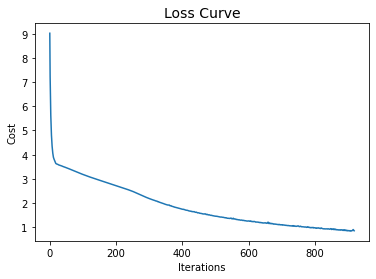

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [ ]:
predictions =mlp.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(testY,predictions)

0.5118434603501545

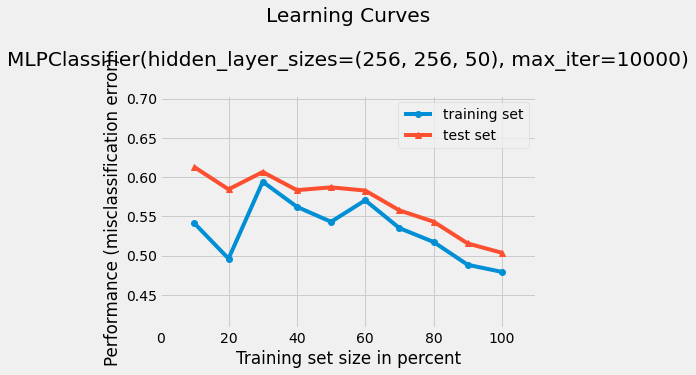

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, trainY, X_test, testY, mlp)
plt.show()